# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Josa Pratama]
- **Email:** [pratamajosa1234@gmail.com]
- **ID Dicoding:** [josapratama]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana dampak cuaca terhadap jumlah penyewaan sepeda?

- Pertanyaan 2 : Bagaimana perbedaan penggunaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [43]:
%matplotlib inline
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Bagian ini mencakup pengambilan dan penggabungan data dari sumber yang berbeda.

In [44]:
# Path ke data
hour_data_path = './data/hour.csv'
day_data_path = './data/day.csv'

# Memuat dataset
hour_data = pd.read_csv(hour_data_path)
day_data = pd.read_csv(day_data_path)

### Assessing Data
Di sini, kita memeriksa data untuk memastikan kolom yang diperlukan tersedia dan menambahkan kolom tambahan untuk kebutuhan analisis.

In [45]:
# Menambahkan kolom sumber
hour_data['source'] = 'hourly'
day_data['source'] = 'daily'

### Cleaning Data
Pada tahap ini, kita memilih kolom yang diperlukan, menamai ulang kolom untuk konsistensi, dan menggabungkan kedua dataset.

In [46]:
# Memilih kolom yang diperlukan dan menamai ulang untuk konsistensi
hour_data = hour_data[['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'source']]
day_data = day_data[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'source']]

# Menggabungkan data per jam dan per hari
combined_data = pd.concat([hour_data, day_data], ignore_index=True)

# Menyimpan ke CSV
combined_data.to_csv('./dashboard/main_data.csv', index=False)

## Exploratory Data Analysis (EDA)


### Explore ...

DeltaGenerator()

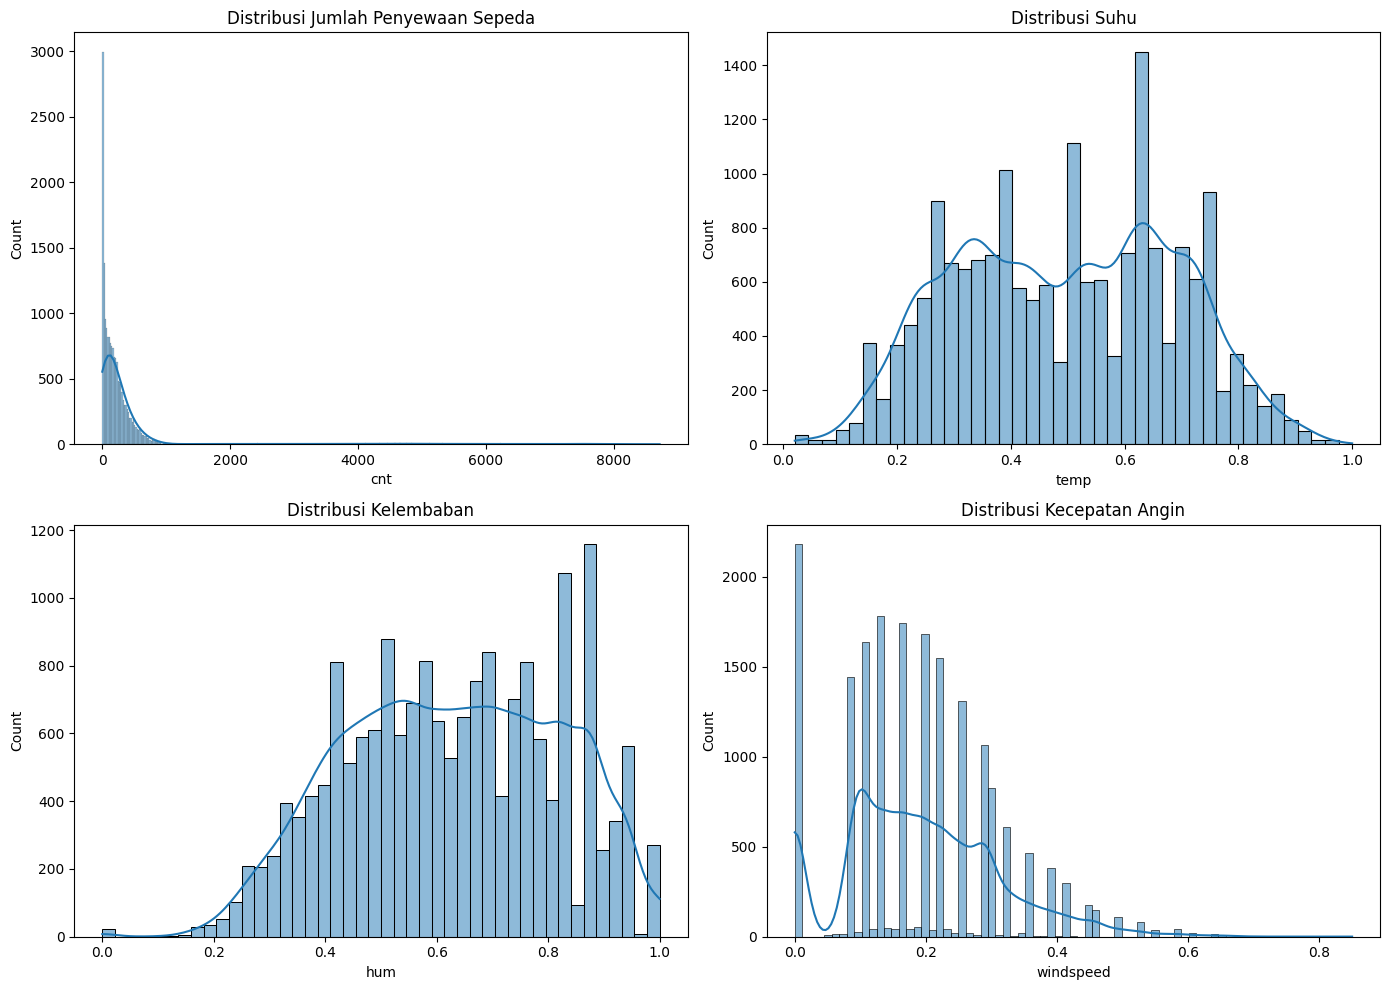

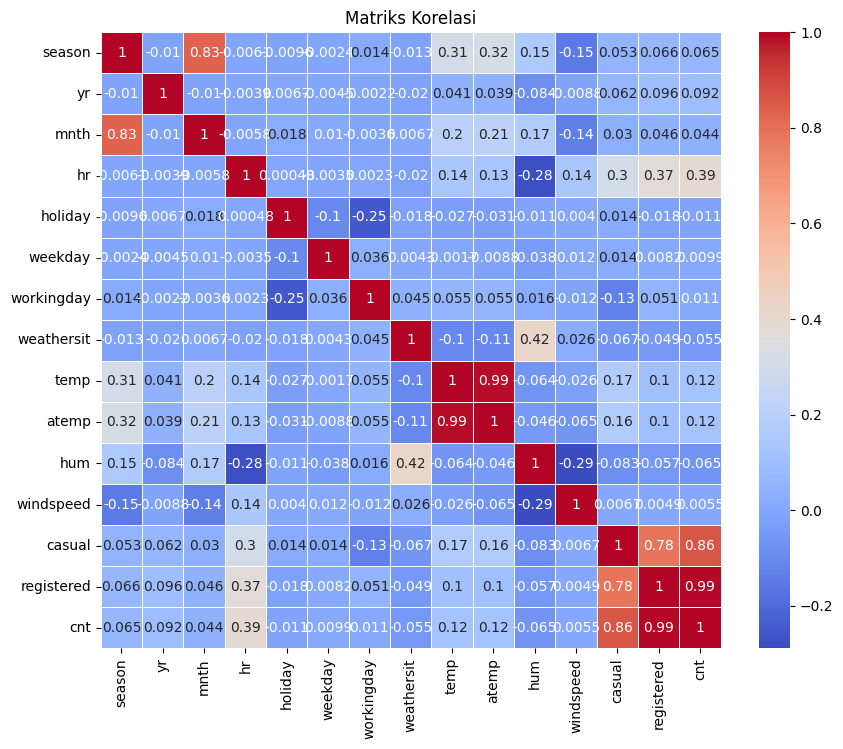

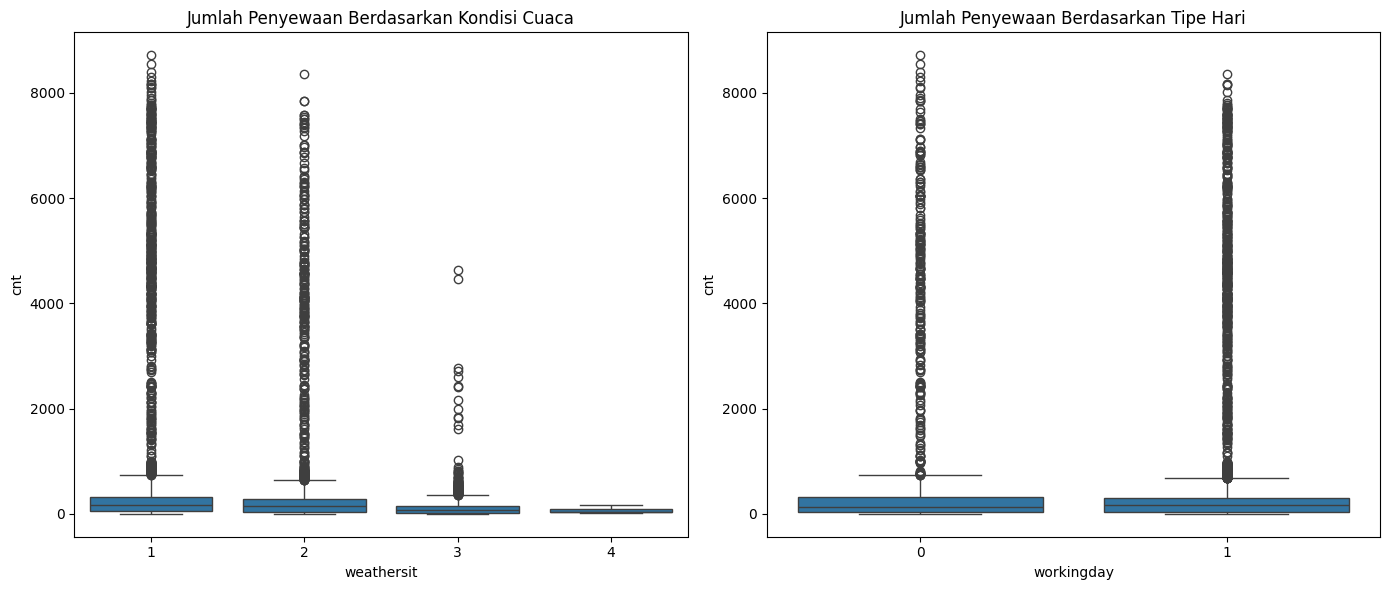

In [47]:
# Memuat data
file_path = './dashboard/main_data.csv'
data = pd.read_csv(file_path)

# 1. Melihat informasi umum dataset
st.write("Informasi dataset:")
st.write(data.describe())  # `info()` tidak mengembalikan output, jadi kita bisa mengganti dengan `data.describe()` untuk Streamlit

st.write("\nStatistik deskriptif:")
st.write(data.describe())

# 2. Memeriksa nilai yang hilang
st.write("\nJumlah nilai yang hilang di setiap kolom:")
st.write(data.isnull().sum())

# 3. Visualisasi distribusi variabel numerik
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')

plt.subplot(2, 2, 2)
sns.histplot(data['temp'], kde=True)
plt.title('Distribusi Suhu')

plt.subplot(2, 2, 3)
sns.histplot(data['hum'], kde=True)
plt.title('Distribusi Kelembaban')

plt.subplot(2, 2, 4)
sns.histplot(data['windspeed'], kde=True)
plt.title('Distribusi Kecepatan Angin')

plt.tight_layout()
st.pyplot(plt)  # Menggunakan st.pyplot untuk menampilkan plot di Streamlit

# 4. Analisis korelasi
numeric_data = data.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
st.pyplot(plt)  # Menggunakan st.pyplot untuk menampilkan plot di Streamlit

# 5. Analisis Berdasarkan Kategori (Weathersit dan Workingday)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Jumlah Penyewaan Berdasarkan Kondisi Cuaca')

plt.subplot(1, 2, 2)
sns.boxplot(x='workingday', y='cnt', data=data)
plt.title('Jumlah Penyewaan Berdasarkan Tipe Hari')

plt.tight_layout()
st.pyplot(plt)  # Menggunakan st.pyplot untuk menampilkan plot di Streamlit

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Dampak Cuaca Terhadap Penyewaan Sepeda


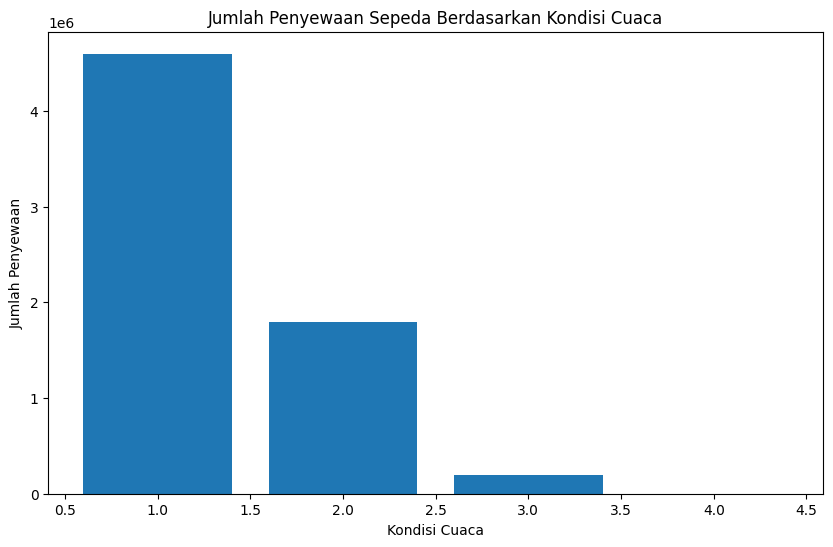

In [48]:
# Pastikan Anda menggunakan magic command untuk menampilkan grafik di notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Define constants
WEATHER_IMPACT_TITLE = "Dampak Cuaca Terhadap Penyewaan Sepeda"

# Path ke data
file_path = 'dashboard/main_data.csv'

# Memuat dataset
data = pd.read_csv(file_path)

# Pilihan visualisasi
print(WEATHER_IMPACT_TITLE)

if 'weathersit' in data.columns and 'cnt' in data.columns:
    # Agregasi data berdasarkan kondisi cuaca
    weather_data = data[['weathersit', 'cnt']].groupby('weathersit').sum().reset_index()
    
    # Membuat grafik
    plt.figure(figsize=(10, 6))
    plt.bar(weather_data['weathersit'], weather_data['cnt'])
    plt.xlabel('Kondisi Cuaca')
    plt.ylabel('Jumlah Penyewaan')
    plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
    plt.show()  # Menampilkan grafik di notebook
else:
    print("Kolom 'weathersit' atau 'cnt' tidak ditemukan dalam dataset.")


### Pertanyaan 2:

Perbedaan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan


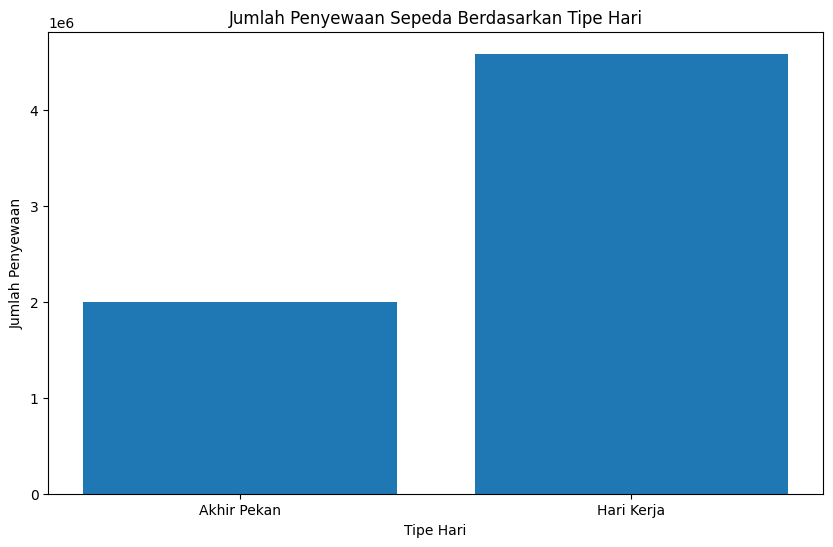

In [49]:
# Pastikan Anda menggunakan magic command untuk menampilkan grafik di notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Define constants
WEEKDAY_WEEKEND_DIFFERENCE_TITLE = "Perbedaan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan"

# Path ke data
file_path = 'dashboard/main_data.csv'

# Memuat dataset
data = pd.read_csv(file_path)

# Pilihan visualisasi
print(WEEKDAY_WEEKEND_DIFFERENCE_TITLE)

if 'workingday' in data.columns and 'cnt' in data.columns:
    # Agregasi data berdasarkan hari kerja
    usage_data = data[['workingday', 'cnt']].groupby('workingday').sum().reset_index()
    usage_data['workingday'] = usage_data['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})
    
    # Membuat grafik
    plt.figure(figsize=(10, 6))
    plt.bar(usage_data['workingday'], usage_data['cnt'])
    plt.xlabel('Tipe Hari')
    plt.ylabel('Jumlah Penyewaan')
    plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tipe Hari')
    plt.show()  # Menampilkan grafik di notebook
else:
    print("Kolom 'workingday' atau 'cnt' tidak ditemukan dalam dataset.")


## Conclusion

### 1. Dampak Cuaca terhadap Jumlah Penyewaan Sepeda

Visualisasi data mengenai dampak cuaca terhadap jumlah penyewaan sepeda memberikan beberapa wawasan penting:

- **Distribusi Jumlah Penyewaan Berdasarkan Cuaca**: Melalui **Box Plot**, terlihat bahwa jumlah penyewaan sepeda memiliki distribusi yang lebih tinggi pada kondisi cuaca cerah dibandingkan dengan mendung atau hujan. Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda ketika cuaca baik.
  
- **Rata-rata Penyewaan Sepeda**: **Bar Chart** yang menggambarkan rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca mengungkapkan bahwa penyewaan meningkat pada hari-hari cerah dan menurun saat cuaca mendung atau hujan. Hal ini menunjukkan bahwa kondisi cuaca yang baik memotivasi lebih banyak orang untuk menyewa sepeda, sementara cuaca buruk mengurangi jumlah penyewaan.

**Insight**: Cuaca memiliki pengaruh signifikan terhadap keputusan pengguna untuk menyewa sepeda. Untuk meningkatkan jumlah penyewaan pada hari-hari dengan cuaca buruk, strategi pemasaran atau promosi khusus dapat diterapkan.

### 2. Perbedaan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan

Visualisasi yang membandingkan penggunaan sepeda antara hari kerja dan akhir pekan menunjukkan:

- **Jumlah Penyewaan Sepeda**: Berdasarkan **Bar Chart**, rata-rata jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Ini mungkin menunjukkan bahwa sepeda lebih banyak digunakan untuk kegiatan sehari-hari, seperti perjalanan ke tempat kerja, selama hari kerja.

**Insight**: Penggunaan sepeda cenderung lebih tinggi selama hari kerja dibandingkan dengan akhir pekan. Dengan memahami pola ini, Anda dapat menyesuaikan penawaran dan promosi untuk memenuhi kebutuhan pengguna pada waktu-waktu tertentu.